In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import glob

### 이미지 전처리

In [2]:
def load_data(img_path, number_of_data=1203):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 1203 입니다.
x_train shape: (1203, 224, 224, 3)
y_train shape: (1203,)


라벨:  0


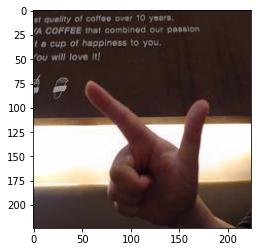

In [3]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 모델 생성

In [4]:
# 동일한 결과 출력을 위한 seed 설정
tf.random.set_seed(42)

In [5]:
n_channel_1 = 64
n_channel_2 = 128
n_channel_3 = 256
n_dense = 256
epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(n_channel_3, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 128)       0

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=epoch)

Epoch 1/10
38/38 [==============================] - 22s 271ms/step - loss: 2.9012 - accuracy: 0.3915
Epoch 2/10
38/38 [==============================] - 9s 224ms/step - loss: 0.9306 - accuracy: 0.5370
Epoch 3/10
38/38 [==============================] - 9s 224ms/step - loss: 0.5720 - accuracy: 0.7731
Epoch 4/10
38/38 [==============================] - 8s 224ms/step - loss: 0.3944 - accuracy: 0.8495
Epoch 5/10
38/38 [==============================] - 8s 223ms/step - loss: 0.2616 - accuracy: 0.9061
Epoch 6/10
38/38 [==============================] - 9s 225ms/step - loss: 0.2096 - accuracy: 0.9210
Epoch 7/10
38/38 [==============================] - 8s 223ms/step - loss: 0.1099 - accuracy: 0.9609
Epoch 8/10
38/38 [==============================] - 8s 224ms/step - loss: 0.1124 - accuracy: 0.9626
Epoch 9/10
38/38 [==============================] - 8s 223ms/step - loss: 0.0731 - accuracy: 0.9784
Epoch 10/10
38/38 [==============================] - 8s 223ms/step - loss: 0.0529 - accuracy: 0.982

### 성능 테스트

In [9]:
image_dir_path = "/content/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 160)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 160 입니다.
x_test shape: (160, 224, 224, 3)
y_test shape: (160,)


In [11]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

5/5 - 0s - loss: 0.6801 - accuracy: 0.8500 - 382ms/epoch - 76ms/step
test_loss: 0.6800848245620728 
test_accuracy: 0.8500000238418579


### 최종 정확도는 약 85%